In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [87]:
red_wine   = pd.read_csv(r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\winequality-red.csv',   sep=';')
white_wine = pd.read_csv(r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\winequality-white.csv')

In [88]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Create new attributes with hand-engineered features.

#### Add New Attribute wine_type

In [90]:
red_wine['wine_type']   = 'red'   
white_wine['wine_type'] = 'white'

#### Add New Attributes quality_label

In [91]:
print('red_wine\'s list of "quality":\t', sorted(red_wine['quality'].unique()))
print('white_wine\'s list of "quality":\t', sorted(red_wine['quality'].unique()))

red_wine's list of "quality":	 [3, 4, 5, 6, 7, 8]
white_wine's list of "quality":	 [3, 4, 5, 6, 7, 8]


Bucket quality (numerical) scores into a new (categorical) attribute called quality_label:

    low: value ≤ 5
    medium: 5 < value ≤ 7
    high: value > 7

In addition, we'll convert quality_label into a Categorical data type by using pd.Categorical().

In [92]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

In [93]:
red_wine.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
quality_label           category
dtype: object

In [95]:
# Preview `value_counts()` of the `quality_label` attribute:
print(red_wine['quality_label'].value_counts())
print()
print(white_wine['quality_label'].value_counts())

medium    837
low       744
high       18
Name: quality_label, dtype: int64

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64


Merge red and white wine datasets with pd.concat():

In [96]:
wines = pd.concat([red_wine, white_wine], axis=0,)

In [98]:
# Re-shuffle records just to randomize data points.
# `drop=True`: this resets the index to the default integer index.
wines = wines.sample(frac=1.0, random_state=42).reset_index(drop=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,6.0,0.28,0.35,1.9,0.037,16.0,120.0,0.99330,3.16,0.69,10.6,5,white,low
1,6.7,0.26,0.49,8.1,0.052,48.0,197.0,0.99558,3.19,0.48,9.5,5,white,low
2,6.5,0.21,0.37,2.5,0.048,70.0,138.0,0.99170,3.33,0.75,11.4,7,white,medium
3,6.4,0.41,0.24,14.0,0.048,24.0,113.0,0.99820,3.44,0.53,9.8,6,white,medium
4,7.0,0.42,0.19,2.3,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,5,red,low


## Exploratory Data Analysis

In [99]:
subset_attributes = ['residual sugar',        #1
                     'total sulfur dioxide',  #2
                     'sulphates',             #3
                     'alcohol',               #4
                     'volatile acidity',      #5
                     'quality']               #6

In [101]:
red_wine[subset_attributes].describe()

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.538806,46.467792,0.658149,10.422983,0.527821,5.636023
std,1.409928,32.895324,0.169507,1.065668,0.179060,0.807569
min,0.900000,6.000000,0.330000,8.400000,0.120000,3.000000
25%,1.900000,22.000000,0.550000,9.500000,0.390000,5.000000
50%,2.200000,38.000000,0.620000,10.200000,0.520000,6.000000
75%,2.600000,62.000000,0.730000,11.100000,0.640000,6.000000
max,15.500000,289.000000,2.000000,14.900000,1.580000,8.000000


In [102]:
rs = round(red_wine[subset_attributes].describe(), 2)
rs

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,2.54,46.47,0.66,10.42,0.53,5.64
std,1.41,32.90,0.17,1.07,0.18,0.81
min,0.90,6.00,0.33,8.40,0.12,3.00
25%,1.90,22.00,0.55,9.50,0.39,5.00
50%,2.20,38.00,0.62,10.20,0.52,6.00
75%,2.60,62.00,0.73,11.10,0.64,6.00
max,15.50,289.00,2.00,14.90,1.58,8.00


In [103]:
ws = round(white_wine[subset_attributes].describe(), 2)
ws

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.39,138.36,0.49,10.51,0.28,5.88
std,5.07,42.50,0.11,1.23,0.10,0.89
min,0.60,9.00,0.22,8.00,0.08,3.00
25%,1.70,108.00,0.41,9.50,0.21,5.00
50%,5.20,134.00,0.47,10.40,0.26,6.00
75%,9.90,167.00,0.55,11.40,0.32,6.00
max,65.80,440.00,1.08,14.20,1.10,9.00


In [19]:
pd.concat([rs, ws], axis=1, 
          keys=['🔴 Red Wine Statistics', 
                '⚪️ White Wine Statistics'])

🔴 Red Wine Statistics                                          \
             residual sugar total sulfur dioxide sulphates  alcohol   
count               1599.00              1599.00   1599.00  1599.00   
mean                   2.54                46.47      0.66    10.42   
std                    1.41                32.90      0.17     1.07   
min                    0.90                 6.00      0.33     8.40   
25%                    1.90                22.00      0.55     9.50   
50%                    2.20                38.00      0.62    10.20   
75%                    2.60                62.00      0.73    11.10   
max                   15.50               289.00      2.00    14.90   

                                ⚪️ White Wine Statistics                       \
      volatile acidity  quality           residual sugar total sulfur dioxide   
count          1599.00  1599.00                  4898.00              4898.00   
mean              0.53     5.64                     6.39               138.36   
std               0.18     0.81                     5.07                42.50   
min               0.12     3.00                     0.60                 9.00   
25%               0.39     5.00                     1.70               108.00   
50%               0.52     6.00                     5.20               134.00   
75%               0.64     6.00                     9.90               167.00   
max               1.58     8.00                    65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

using the keys parameter in pd.concat() to seperate based on wine quality:

In [104]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']

In [105]:
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(), 2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(), 2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(), 2)

In [106]:
pd.concat([ls, ms, hs], axis=1, 
          keys=['👎 Low Quality Wine', 
                '👌 Medium Quality Wine', 
                '👍 High Quality Wine'])

👎 Low Quality Wine                                     \
                 alcohol volatile acidity       pH  quality   
count            2384.00          2384.00  2384.00  2384.00   
mean                9.87             0.40     3.21     4.88   
std                 0.84             0.19     0.16     0.36   
min                 8.00             0.10     2.74     3.00   
25%                 9.30             0.26     3.11     5.00   
50%                 9.60             0.34     3.20     5.00   
75%                10.40             0.50     3.31     5.00   
max                14.90             1.58     3.90     5.00   

      👌 Medium Quality Wine                                     \
                    alcohol volatile acidity       pH  quality   
count               3915.00          3915.00  3915.00  3915.00   
mean                  10.81             0.31     3.22     6.28   
std                    1.20             0.14     0.16     0.45   
min                    8.40             0.08     2.72     6.00   
25%                    9.80             0.21     3.11     6.00   
50%                   10.80             0.27     3.21     6.00   
75%                   11.70             0.36     3.33     7.00   
max                   14.20             1.04     4.01     7.00   

      👍 High Quality Wine                                   
                  alcohol volatile acidity      pH quality  
count              198.00           198.00  198.00  198.00  
mean                11.69             0.29    3.23    8.03  
std                  1.27             0.12    0.16    0.16  
min                  8.50             0.12    2.88    8.00  
25%                 11.00             0.21    3.13    8.00  
50%                 12.00             0.28    3.23    8.00  
75%                 12.60             0.35    3.33    8.00  
max                 14.00             0.85    3.72    9.00

## Univariate Analysis

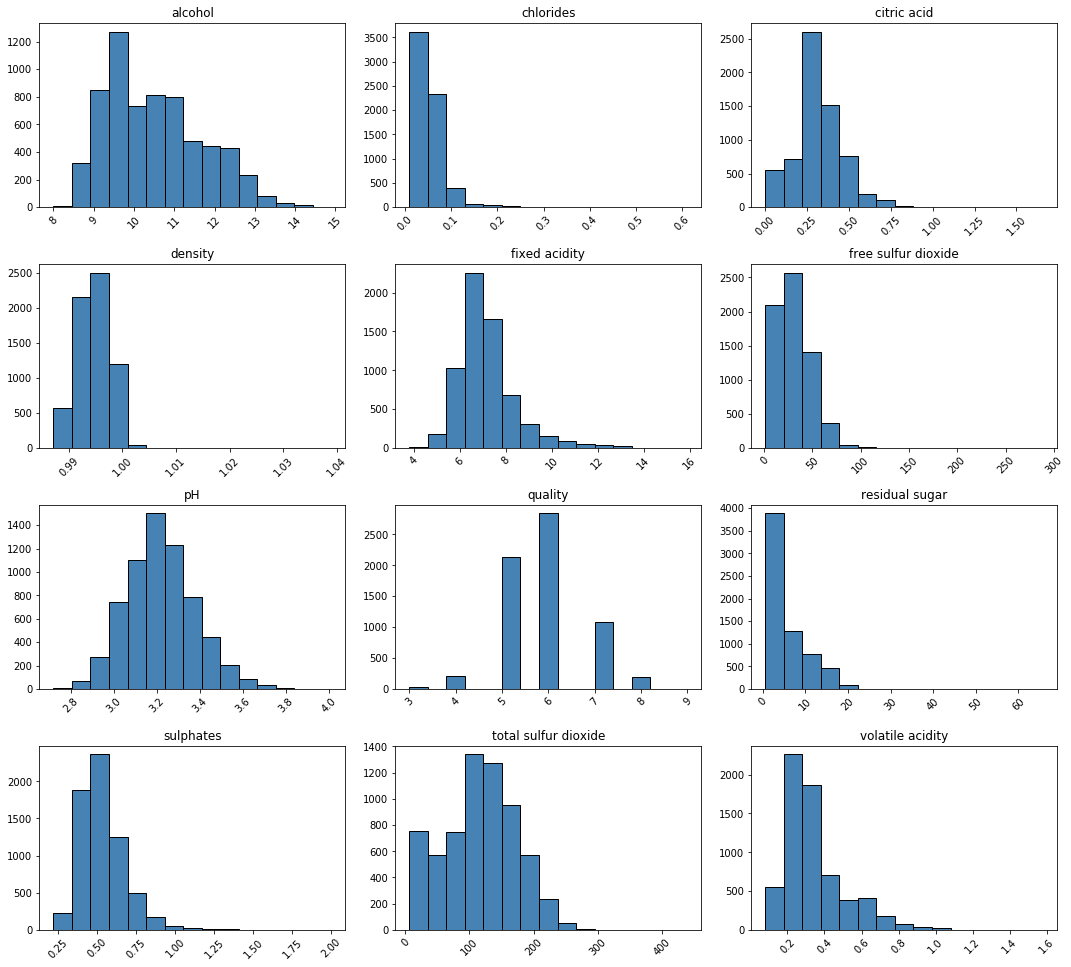

In [25]:
fig = wines.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))  

Let’s drill down to visualizing one of the continuous, numeric attributes — sulphates.

Essentially a histogram or a density plot works quite well in understanding how the data is distributed for that attribute.

#### Histogram

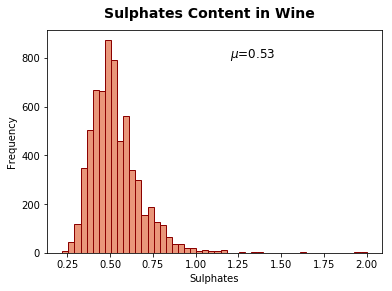

In [26]:
# Prepare the figure
fig = plt.figure( figsize=(6,4) )

title = fig.suptitle("Sulphates Content in Wine", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

# Prepare a subplot
ax = fig.add_subplot(1,1,1) # More info: https://youtu.be/afITiFR6vfw?t=1m53s
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")

# Add text into the subplot
ax.text(x=1.2, 
        y=800, 
        s=r'$\mu$='+str(round(wines['sulphates'].mean(), 2)), 
        fontsize=12)

freq, bins, patches = ax.hist(wines['sulphates'], 
                              bins=50,
                              color='darksalmon', 
                              edgecolor='darkred', linewidth=1.0)

#### Density plot

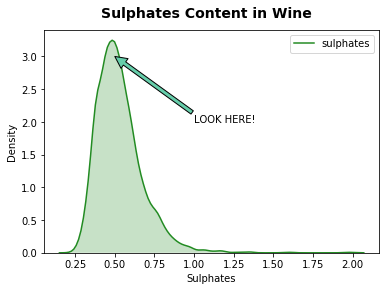

In [28]:
# Prepare the figure
fig = plt.figure( figsize=(6,4) )
title = fig.suptitle("Sulphates Content in Wine", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

# Prepare a subplot
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 

# Annotate: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html
ax1.annotate('LOOK HERE!', 
             xy=(0.5, 3), 
             xytext=(1.0, 2.0),
             arrowprops=dict(facecolor='mediumaquamarine')) 

# Seaborn time!
sns.kdeplot(wines['sulphates'], 
            ax=ax1, 
            shade=True, 
            color='forestgreen');

## Side-by-side: Histogram + Density Plot

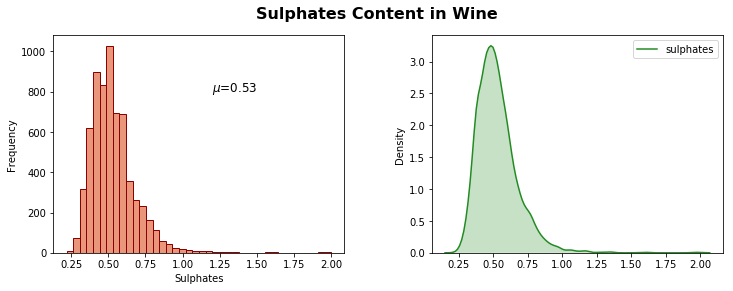

In [107]:
fig = plt.figure( figsize=(12,4) )
title = fig.suptitle("Sulphates Content in Wine", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.88, wspace=0.3)

#===========#
# Histogram #
#===========#
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")

ax1.text(x=1.2, y=800, 
         s=r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)

freq, bins, patches = ax1.hist(wines['sulphates'], 
                               bins=40,
                               color='darksalmon',
                               edgecolor='darkred', linewidth=1)

#==============#
# Density Plot #
#==============#
ax2 = fig.add_subplot(1,2,2) 
ax2.set_ylabel("Density") 

sns.kdeplot(wines['sulphates'], ax=ax2, shade=True, color='forestgreen');

#=============#
# Save Figure #
#=============#
# fig.savefig('suplhates_content_in_wine_side-by-side.jpg')

## Discrete Categorical Attribute

In [108]:
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))

print( w_q[0] )
print( w_q[1] )

[6, 5, 7, 4, 8, 3, 9]
[2836, 2138, 1079, 216, 193, 30, 5]


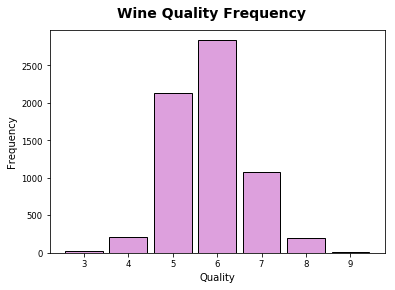

In [109]:
fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
ax.tick_params(axis='both', which='major', labelsize=8.5)

bar = ax.bar(w_q[0],   # i.e. [6, 5, 7, 4, 8, 3, 9]
             w_q[1], # i.e. [2836, 2138, 1079, 216, 193, 30, 5]
             width=0.85,
             color='plum', 
             edgecolor='black', linewidth=1)

## Visualizing Data in Two Dimensions

One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix and depict it as a heatmap.

In [111]:
# Compute pairwise correlation of Dataframe's attributes
corr = wines.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


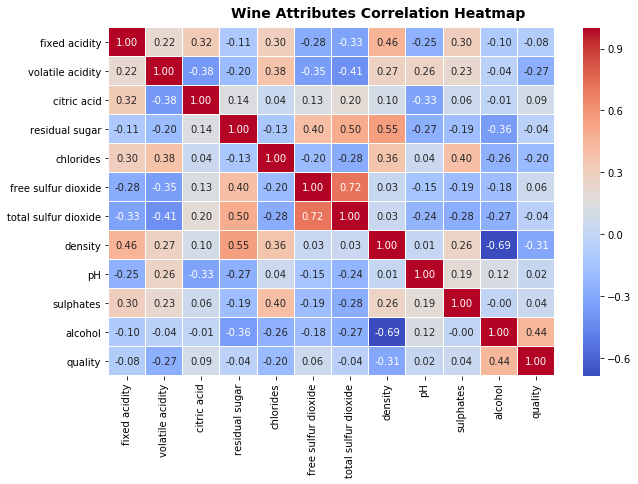

In [112]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Wine Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold');

## Pair-Wise Scatter Plots

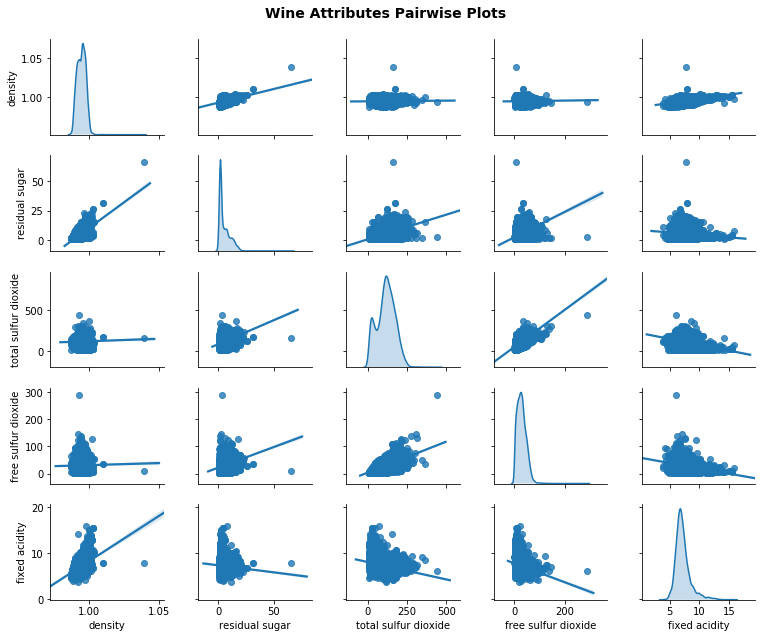

In [114]:
# Attributes of interest
cols = ['density', 
        'residual sugar', 
        'total sulfur dioxide', 
        'free sulfur dioxide', 
        'fixed acidity']

pp = sns.pairplot(wines[cols], 
                  height=1.8, aspect=1.2,
                  #plot_kws=dict(edgecolor="k", linewidth=0.5),
                  #diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde",
                  kind='reg') # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', 
              fontsize=14, fontweight='bold');

You can also fit linear regression models to the scatter plots.

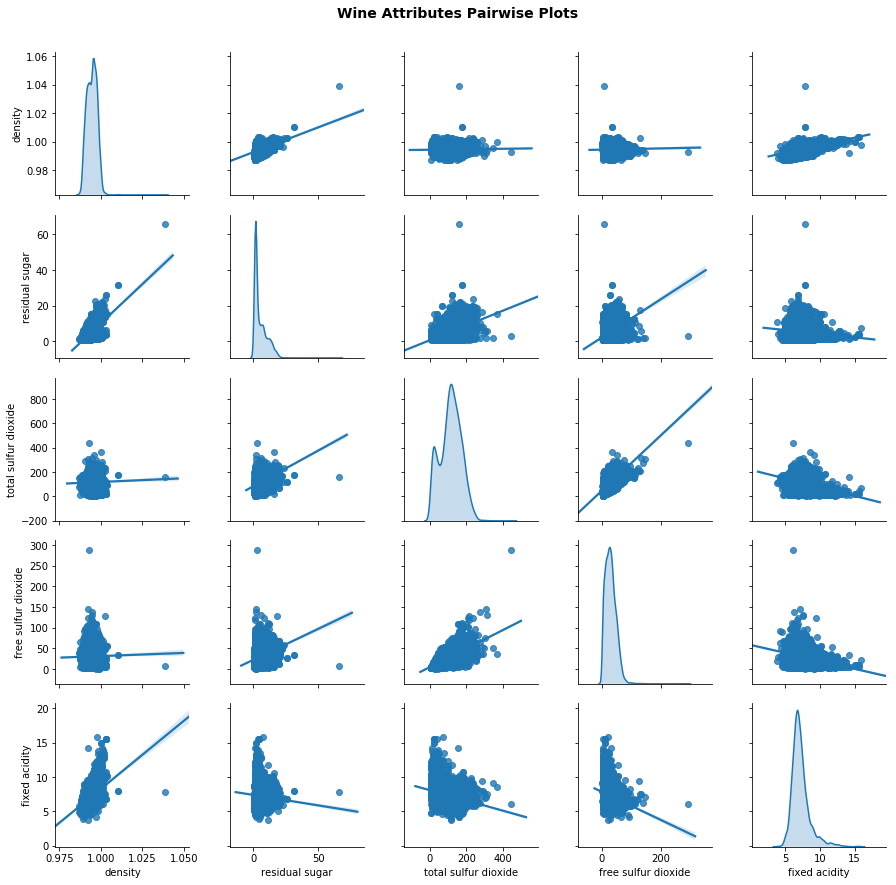

In [43]:
pp = sns.pairplot(wines[cols], 
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde", # use "kde" for diagonal plots
                  kind="reg") # <== 😀 linear regression to the scatter plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14, fontweight='bold');

## Parallel Coordinates

In [115]:
# Attributes of interest
cols = ['density', 
        'residual sugar', 
        'total sulfur dioxide', 
        'free sulfur dioxide', 
        'fixed acidity']

In [116]:
subset_df = wines[cols]

In [117]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)

scaled_df = pd.DataFrame(scaled_df, columns=cols)

final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

,density,residual sugar,total sulfur dioxide,free sulfur dioxide,fixed acidity,wine_type
0,-0.465786,-0.744778,0.075294,-0.818419,-0.937495,white
1,0.294608,0.558444,1.437704,0.984598,-0.397511,white
2,-0.999397,-0.618660,0.393779,2.224172,-0.551792,white
3,1.168395,1.798608,-0.048561,-0.367664,-0.628933,white
4,0.021133,-0.660699,-1.410971,-0.705730,-0.166089,red


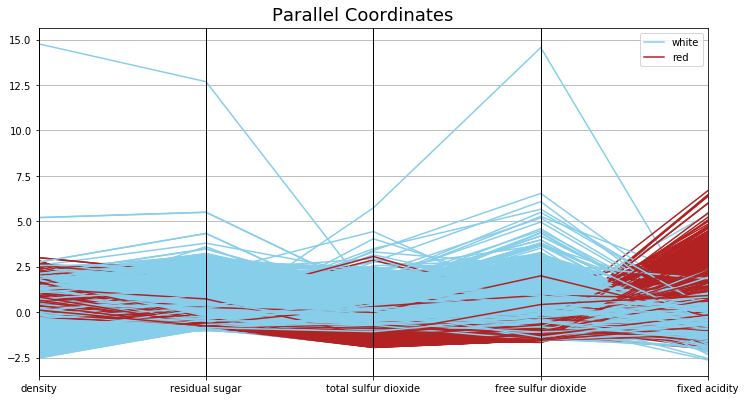

In [118]:
from pandas.plotting import parallel_coordinates

fig   = plt.figure(figsize=(12, 6))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(final_df, 
                          'wine_type', 
                          color=('skyblue', 'firebrick'))

Each vertical line represents one data attribute (e.g. residual sugar).

One complete set of connected line segments across all the attributes represents one data point.

Hence points that tend to cluster will appear closer together.

Just by looking at it, we can clearly see that density is slightly more for __red wines__ as compared to __white__ — since there are more red lines clustered above the white ones.

Also residual sugar and total sulfur dioxide are higher for white wines as compared to red, while fixed acidity is higher for red wines as compared to white.


## Two Continuous Numeric Attributes

#### The traditional way — using matplotlib:

Text(0.5,1.05,'Wine Sulphates - Alcohol Content')

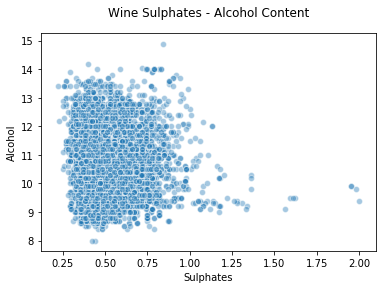

In [119]:
plt.scatter(wines['sulphates'], 
            wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content', y=1.05)

#### The better alternative — using Seaborn's jointplot():

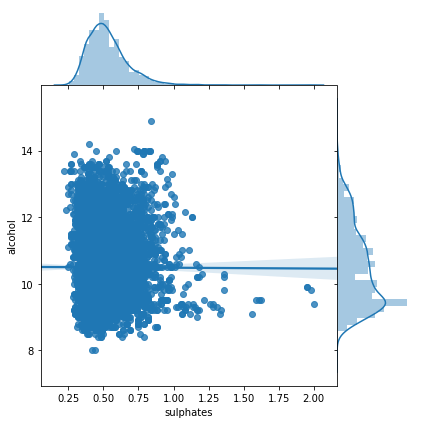

In [120]:
jp = sns.jointplot(data=wines,
                   x='sulphates', 
                   y='alcohol', 
                   kind='reg', # <== 😀 Add regression and kernel density fits
                   space=0, height=6, ratio=4);

## Two Discrete Categorical Attributes

#### The traditional way — using matplotlib:

In [125]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [122]:
rw_q = red_wine['quality'].value_counts()

In [123]:
rw_q.index

Int64Index([5, 6, 7, 4, 8, 3], dtype='int64')

In [124]:
rw_q.values

array([681, 638, 199,  53,  18,  10], dtype=int64)

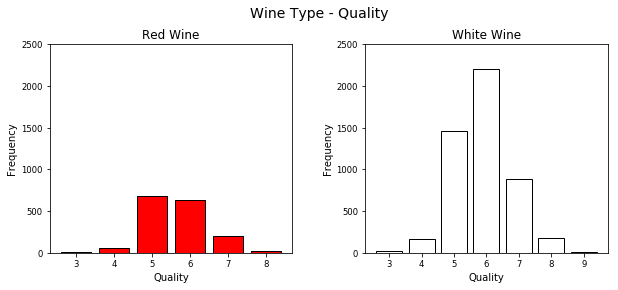

In [126]:
fig = plt.figure(figsize=(10,4))

title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 

rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))

ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)

bar1 = ax1.bar(rw_q[0], 
               rw_q[1], 
               color='red', 
               edgecolor='black', 
               linewidth=1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 

ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))

ax2.set_ylim([0,2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)

bar2 = ax2.bar(ww_q[0], 
               ww_q[1], 
               color='white', 
               edgecolor='black', 
               linewidth=1)


#### The better alternative — using Seaborn's countplot():

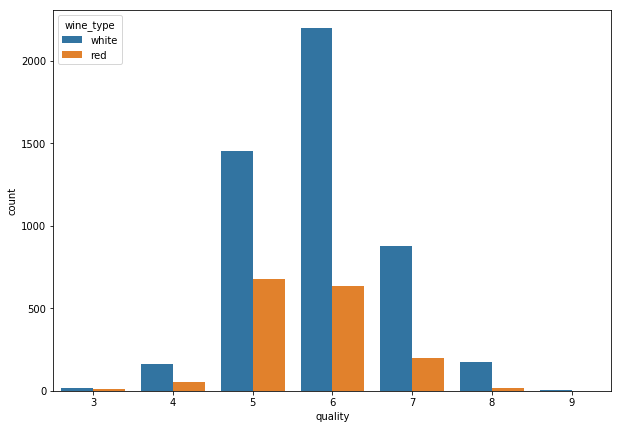

In [127]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=wines, 
                   x="quality", 
                   hue="wine_type")

## Mixed Attributes 

numeric and categorical together

#### traditional way — using matplotlib (histograms):

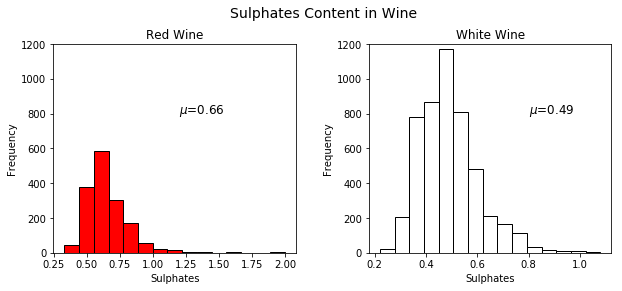

In [57]:
fig   = plt.figure(figsize=(10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])

ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)

r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], 
                                     color='red', 
                                     bins=15,
                                     edgecolor='black', 
                                     linewidth=1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])

ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)

w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], 
                                     color='white', 
                                     bins=15,
                                     edgecolor='black', 
                                     linewidth=1)

#### Using matplotlib (density plots):

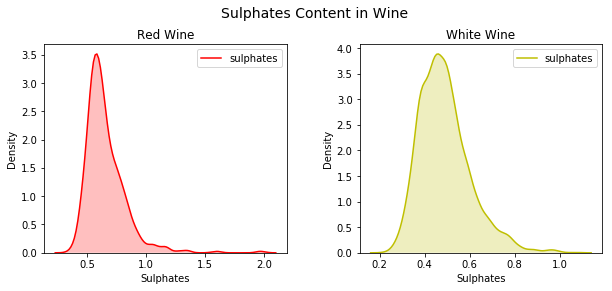

In [59]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y');

#### using Seaborn's FacetGrid():

FacetGrid is used to draw plots with multiple Axes where each Axes shows the same relationship conditioned on different levels of some variable. It's possible to condition on up to three variables by assigning variables to the rows and columns of the grid and using different colors for the plot elements.

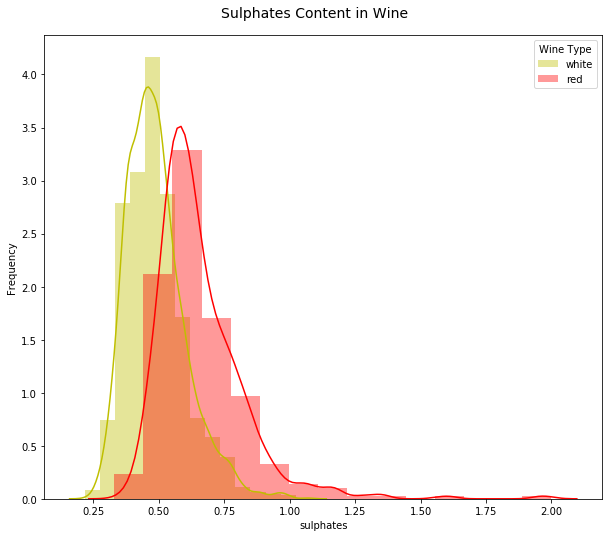

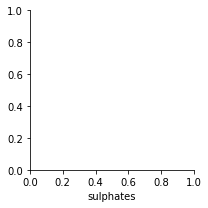

In [66]:
fig   = plt.figure(figsize=(10,8))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(data=wines, 
                  hue='wine_type', 
                  palette={"red": "r", "white": "y"})

g.map(sns.distplot, 
      'sulphates', 
      kde=True, 
      bins=15, 
      ax=ax)

ax.legend(title='Wine Type')

## Box [📦] and Violin [🎻] Plots

Box plots are another way of effectively depicting groups of numeric data based on the different values in the categorical attribute.

Additionally, box plots are a good way to know the quartile values in the data and also potential outliers.

Text(0,0.5,'Wine Alcohol %')

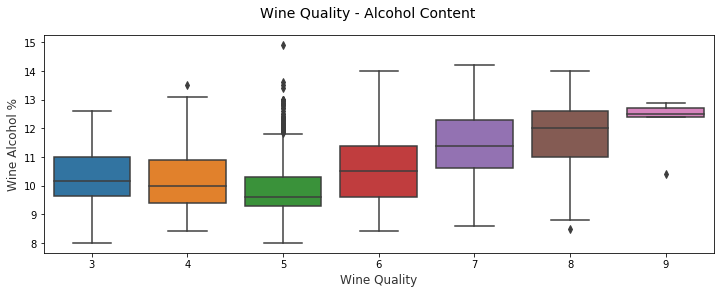

In [67]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(data=wines,  
            x="quality", 
            y="alcohol", 
            ax=ax)

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)

Another similar visualization is violin plots, which is also an effective way to visualize grouped numeric data using kernel density plots — depicting the probability density of the data at different values.

Text(0,0.5,'Wine Sulphates')

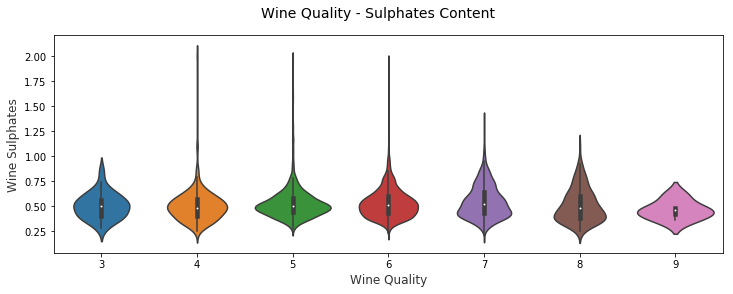

In [68]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(data=wines,
               x="quality", 
               y="sulphates",   
               ax=ax)

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size=12,alpha=0.8)

## Visualizing Data in Three Dimensions

we'll use color (i.e. hue) as the third dimension to represent wine_type.

Text(0.5,0.98,'Wine Attributes Pairwise Plots')

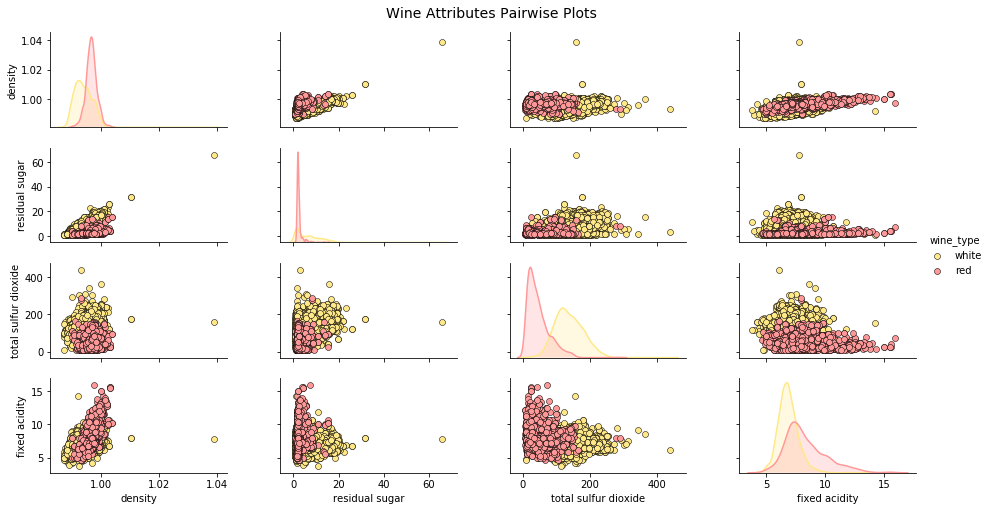

In [69]:
# Attributes of interest
cols = ['density', 
        'residual sugar', 
        'total sulfur dioxide', 
        'fixed acidity', 
        'wine_type']
        
pp = sns.pairplot(data=wines[cols], 
                  hue='wine_type', # <== 😀 Look here!
                  height=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

## Three Continuous Numeric Attributes

In [131]:
%matplotlib notebook
%matplotlib notebook

fig = plt.figure(figsize=(8, 6))
ax  = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')


<IPython.core.display.Javascript object>

Text(0.5,0,'Alcohol')

## Mixed Attributes (Numeric & Categorical)

#### Using sns.pairplot()

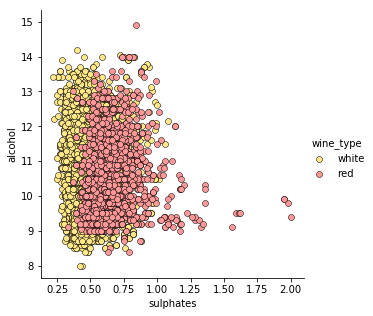

In [72]:
# Plot pairwise relationships in a dataset.
jp = sns.pairplot(data=wines, 
                  x_vars=["sulphates"], 
                  y_vars=["alcohol"], 
                  height=4.5,
                  hue="wine_type", # <== 😀 Look here!
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

    The attribute sulphates is represented via the x-axis.
    The attribute alcohol is represented via the y-axis.
    The attribute wine_type is represented by the color.

#### Using sns.lmplot() to fit linear regression models to the scatter plots:

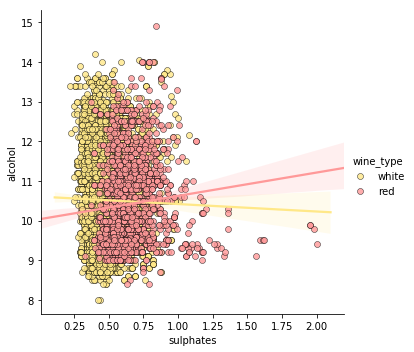

In [73]:
# Plot data and regression model fits across a FacetGrid.
lp = sns.lmplot(data=wines,
                x='sulphates', 
                y='alcohol', 
                hue='wine_type', # <== 😀 Look here!
                palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

#### Using sns.kdeplot():

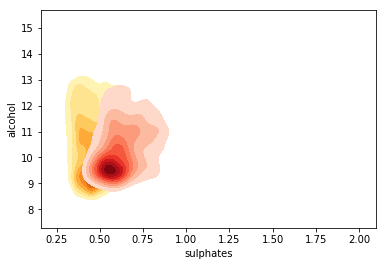

In [75]:
ax = sns.kdeplot(white_wine['sulphates'], # <== 
                 white_wine['alcohol'],   # <== 
                 cmap="YlOrBr", 
                 shade=True, shade_lowest=False)

ax = sns.kdeplot(red_wine['sulphates'], # <== 
                 red_wine['alcohol'],   # <== 
                 cmap="Reds", 
                 shade=True, shade_lowest=False)

#### For box plots [📦] and violin plots [🎻], we can split them based on wine_type:

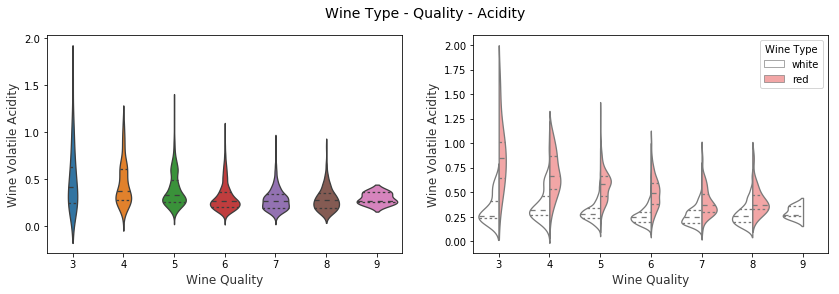

In [78]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

#############
# Left Plot #
#############
sns.violinplot(data=wines, 
               x="quality",
               y="volatile acidity",
               inner="quart", linewidth=1.3,
               ax=ax1)

ax1.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size=12,alpha=0.8)

##############
# Right Plot #
##############
sns.violinplot(data=wines,
               x="quality", 
               y="volatile acidity", 
               hue="wine_type", # <== 
               split=True,      # <== 
               palette={"red": "#FF9999",  # <== 
                        "white": "white"}, # <== 
               inner="quart", linewidth=1.3,
               ax=ax2)

ax2.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size=12,alpha=0.8)
plt.legend(loc='upper right', title='Wine Type');

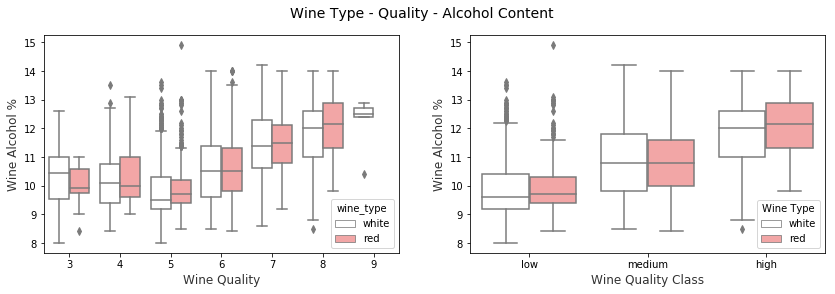

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

#############
# Left Plot #
#############
sns.boxplot(data=wines, 
            x="quality",
            y="alcohol", 
            hue="wine_type", # <== 
            palette={"red": "#FF9999",  # <== 
                     "white": "white"}, # <== 
            ax=ax1)

ax1.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)

##############
# Right Plot #
##############
sns.boxplot(data=wines, 
            x="quality_label",
            y="alcohol", 
            hue="wine_type", # <== 
            palette={"red": "#FF9999",  # <== 
                     "white": "white"}, # <== 
            ax=ax2)

ax2.set_xlabel("Wine Quality Class",size=12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)
plt.legend(loc='best', title='Wine Type');

## Visualizing Data in Four Dimensions

Factors:

    X-axis
    Y-axis
    Size
    Color

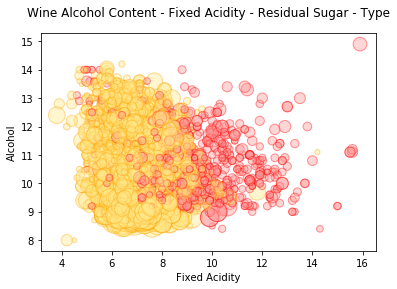

In [83]:
size = wines['residual sugar']*25

fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])] # #ff9999 Light salmon pink, #FFE888 - Pinky Yellowish
edge_colors = ['red'     if wt=='red' else 'orange'  for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], # <== 1st DIMENSION
            wines['alcohol'],       # <== 2nd DIMENSION
            s=size,                 # <== 3rd DIMENSION
            color=fill_colors,      # <== 4th DIMENSION             
            edgecolors=edge_colors,
            alpha=0.4)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05);